# IMDB Top 100 Movies

Notebook com análise simples dos Top 100 filmes do IMDB 

Os dados estão em um arquivo csv

In [1]:
#Importa o pandas e a biblioteca DataFrame
import pandas as pd
from pandas import DataFrame

In [2]:
#Usa o método read_csv, informando o nome do arquivo
#A base csv está na mesma pasta em que o notebook foi executado. 
#Se o arquivo estivesse em uma pasta diferente, teria de ser passado o caminho inteiro do arquivo
dados = pd.read_csv('100_Movies.csv')

In [3]:
#Exibe a base neste notebook
dados

,Unnamed: 0,Movie Name,Year Released,Runtime (min),IMDB Rating,Votes,Gross (Million $)
0,0,The Godfather,1972,175,9.2,"1,667,868",134.97
1,1,The Shawshank Redemption,1994,142,9.3,"2,410,575",28.34
2,2,Schindler's List,1993,195,8.9,"1,242,057",96.90
3,3,Raging Bull,1980,129,8.2,"328,641",23.38
4,4,Casablanca,1942,102,8.5,"532,397",1.02
...,...,...,...,...,...,...,...
95,95,Rear Window,1954,112,8.5,"454,266",36.76
96,96,The Third Man,1949,93,8.1,"161,967",0.45
97,97,Rebel Without a Cause,1955,111,7.7,"85,254",****
98,98,North by Northwest,1959,136,8.3,"305,149",13.28


In [4]:
#Usa o read_table, para que o separador do arquivo csv seja informado explicitamente ao python
dados = pd.read_table('100_Movies.csv',sep=',')

In [5]:
dados

,Unnamed: 0,Movie Name,Year Released,Runtime (min),IMDB Rating,Votes,Gross (Million $)
0,0,The Godfather,1972,175,9.2,"1,667,868",134.97
1,1,The Shawshank Redemption,1994,142,9.3,"2,410,575",28.34
2,2,Schindler's List,1993,195,8.9,"1,242,057",96.90
3,3,Raging Bull,1980,129,8.2,"328,641",23.38
4,4,Casablanca,1942,102,8.5,"532,397",1.02
...,...,...,...,...,...,...,...
95,95,Rear Window,1954,112,8.5,"454,266",36.76
96,96,The Third Man,1949,93,8.1,"161,967",0.45
97,97,Rebel Without a Cause,1955,111,7.7,"85,254",****
98,98,North by Northwest,1959,136,8.3,"305,149",13.28


In [6]:
#Renomeia primeira coluna do DataFrame de 'Unnamed: 0' para 'Position'
dados = dados.rename({'Unnamed: 0':'Position'},axis=1)

In [7]:
dados.head()

,Position,Movie Name,Year Released,Runtime (min),IMDB Rating,Votes,Gross (Million $)
0,0,The Godfather,1972,175,9.2,"1,667,868",134.97
1,1,The Shawshank Redemption,1994,142,9.3,"2,410,575",28.34
2,2,Schindler's List,1993,195,8.9,"1,242,057",96.90
3,3,Raging Bull,1980,129,8.2,"328,641",23.38
4,4,Casablanca,1942,102,8.5,"532,397",1.02


In [8]:
#Substitui "." por vírgula "," na coluna 'Gross (Million $)'
dados['Gross (Million $)'] = [x.replace(',','.') for x in dados['Gross (Million $)']]

In [9]:
dados.head()

,Position,Movie Name,Year Released,Runtime (min),IMDB Rating,Votes,Gross (Million $)
0,0,The Godfather,1972,175,9.2,"1,667,868",134.97
1,1,The Shawshank Redemption,1994,142,9.3,"2,410,575",28.34
2,2,Schindler's List,1993,195,8.9,"1,242,057",96.90
3,3,Raging Bull,1980,129,8.2,"328,641",23.38
4,4,Casablanca,1942,102,8.5,"532,397",1.02


In [10]:
#Substitui os asteriscos e os espaços vazios da coluna Gross(Million $) por zero
dados['Gross (Million $)'] = [x.replace('*','0') for x in dados['Gross (Million $)']]
dados['Gross (Million $)'] = [x.replace(' ','0') for x in dados['Gross (Million $)']]

In [11]:
#Converte os dados da coluna Gross(Million $) para decimal
dados['Gross (Million $)'] = dados['Gross (Million $)'].astype(float)

In [12]:
#Remove a vírgula da coluna Votes por ponto e, depois, converte em inteiro
dados['Votes'] = [x.replace(',','') for x in dados['Votes']]
dados['Votes'] = dados['Votes'].astype(int)

In [13]:
#Ordena o DataFrame em ordem decrescente pela coluna Gross(Million $)
dados.sort_values(by=['Gross (Million $)'],ascending=False)

,Position,Movie Name,Year Released,Runtime (min),IMDB Rating,Votes,Gross (Million $)
34,34,Titanic,1997,194,7.8,1074677,659.33
21,21,E.T. the Extra-Terrestrial,1982,115,7.8,379818,435.11
59,59,Jurassic Park,1993,127,8.1,889876,402.45
32,32,The Lord of the Rings: The Return of the King,2003,201,8.9,1679792,377.85
15,15,Forrest Gump,1994,142,8.8,1862340,330.25
...,...,...,...,...,...,...,...
42,42,To Kill a Mockingbird,1962,129,8.3,298661,0.00
14,14,Sunset Blvd.,1950,110,8.4,206285,0.00
26,26,It's a Wonderful Life,1946,130,8.6,414116,0.00
69,69,A Place in the Sun,1951,122,7.8,20721,0.00


In [14]:
##Ordena em ordem decrescente por Gross(Million$) e por Votes
dados.sort_values(by=['Gross (Million $)','Votes'],ascending=False)

,Position,Movie Name,Year Released,Runtime (min),IMDB Rating,Votes,Gross (Million $)
34,34,Titanic,1997,194,7.8,1074677,659.33
21,21,E.T. the Extra-Terrestrial,1982,115,7.8,379818,435.11
59,59,Jurassic Park,1993,127,8.1,889876,402.45
32,32,The Lord of the Rings: The Return of the King,2003,201,8.9,1679792,377.85
15,15,Forrest Gump,1994,142,8.8,1862340,330.25
...,...,...,...,...,...,...,...
41,41,The Philadelphia Story,1940,112,7.9,64819,0.00
88,88,Stagecoach,1939,96,7.9,44998,0.00
75,75,Giant,1956,201,7.6,34944,0.00
89,89,Mutiny on the Bounty,1935,132,7.7,21307,0.00


# Gráficos

In [15]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import matplotlib as mat

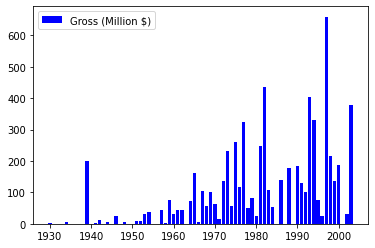

In [16]:
#Gráfico de Barras

#Define os eixos
x = dados['Year Released']
y = dados['Gross (Million $)']

#Forma o gráfico
plt.bar(x,y,label = 'Gross (Million $)',color = 'b')
plt.legend()

#Exibe o gráfico
plt.show()

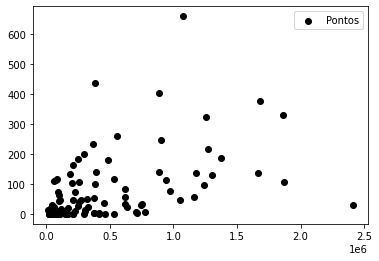

In [17]:
#Gráfico de Dispersão
x2 = dados['Votes']
y2 = dados['Gross (Million $)']

plt.scatter(x2,y2, label ='Pontos', color = 'black',marker = 'o')
plt.legend()
plt.show()

# Fim